In [1]:
import itertools

import ortools
import pandas as pd
from ALS.CP import solve_multiple_runways_cp, solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip, solve_single_runway_mip
from ALS.CP_MIP import solve_cp_sat_model_multiple_runways, solve_cp_sat_model_single_runway
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.utils import read_data
from ALS.visualization import visualize_solution
from ortools.sat.python import cp_model
from tqdm import tqdm

In [2]:
print(ortools.__version__)

9.11.4210


In [3]:
filename = "data/airland2.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2

	       Reading data from airland2.txt

-> Number of planes: 15 



In [4]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, model = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times,
                            decision_strategies=decision_strategies_multiple, 
                            hint=True,  
                            search_strategy=cp_model.LP_SEARCH)
metrics_CP_multiple_runway = performance_CP(solver, model, planes_data)

		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 6: 128 | Target Time: 121 | Penalty: 210.0

		Performance Metrics for CP

-> Execution time (s): 0.45
-> Number of variables: 285
-> Number of constraints: 721
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 788
-> Best objective bound: 210.0



		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 14: 344 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.55
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 194
-> Best objective bound: 1480.0



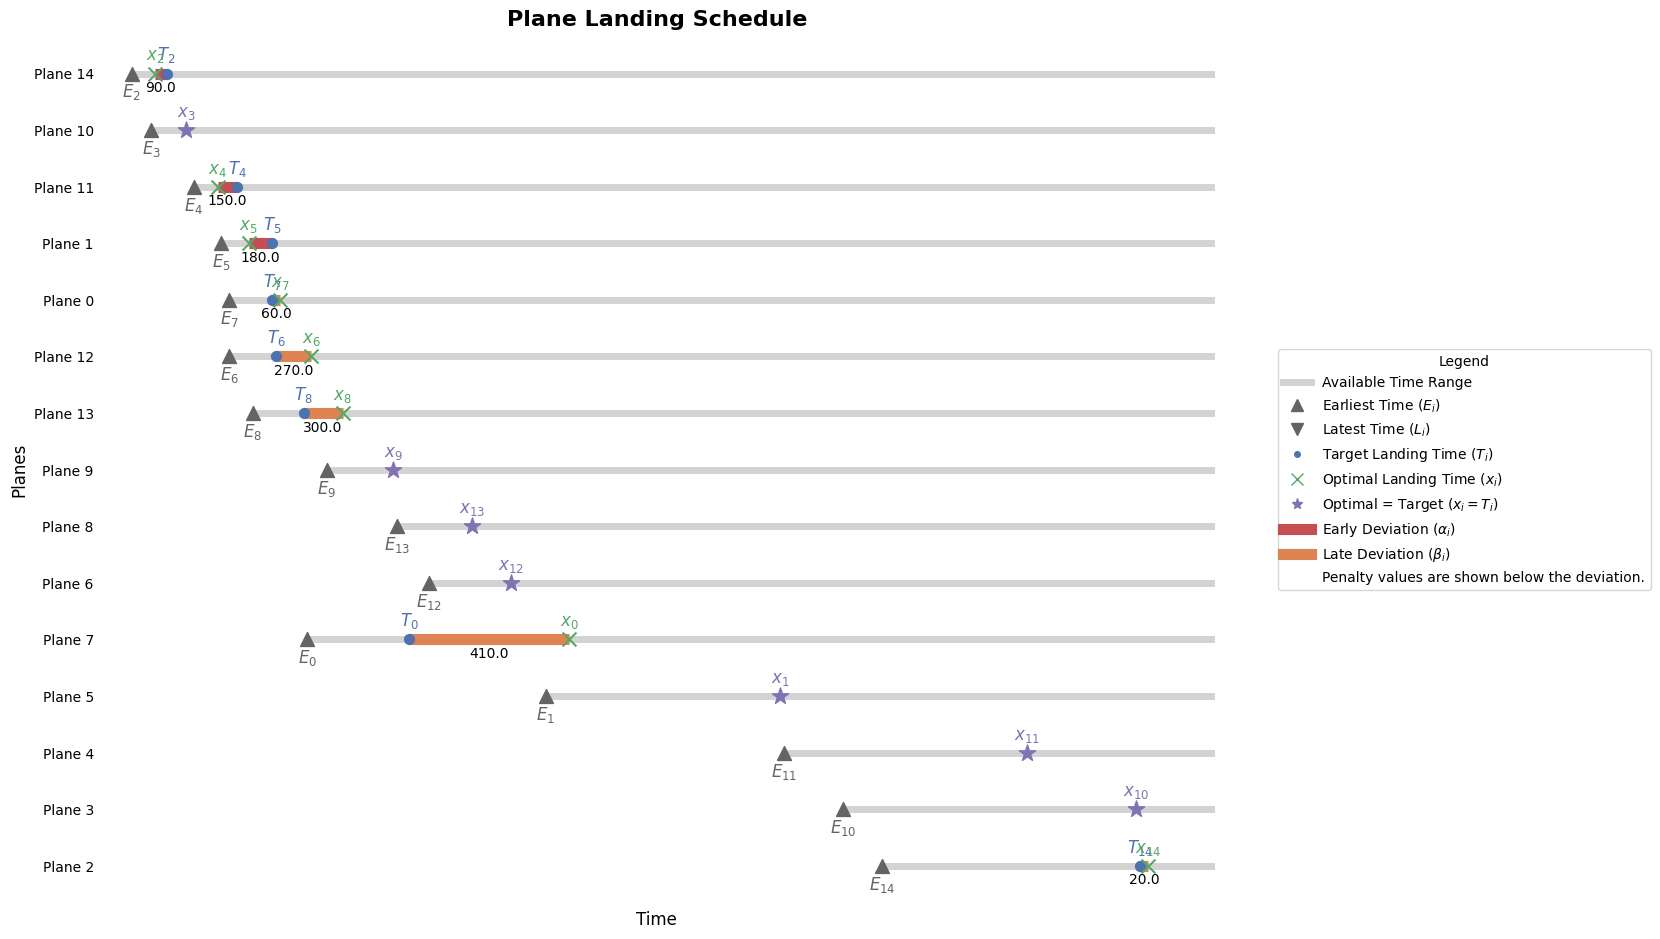

In [5]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, model, variables = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,
        hint=True, search_strategy=cp_model.FIXED_SEARCH)
metrics_CP_single_runway = performance_CP(solver, model, planes_data)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.59
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 0
-> Best objective bound: 1480.0



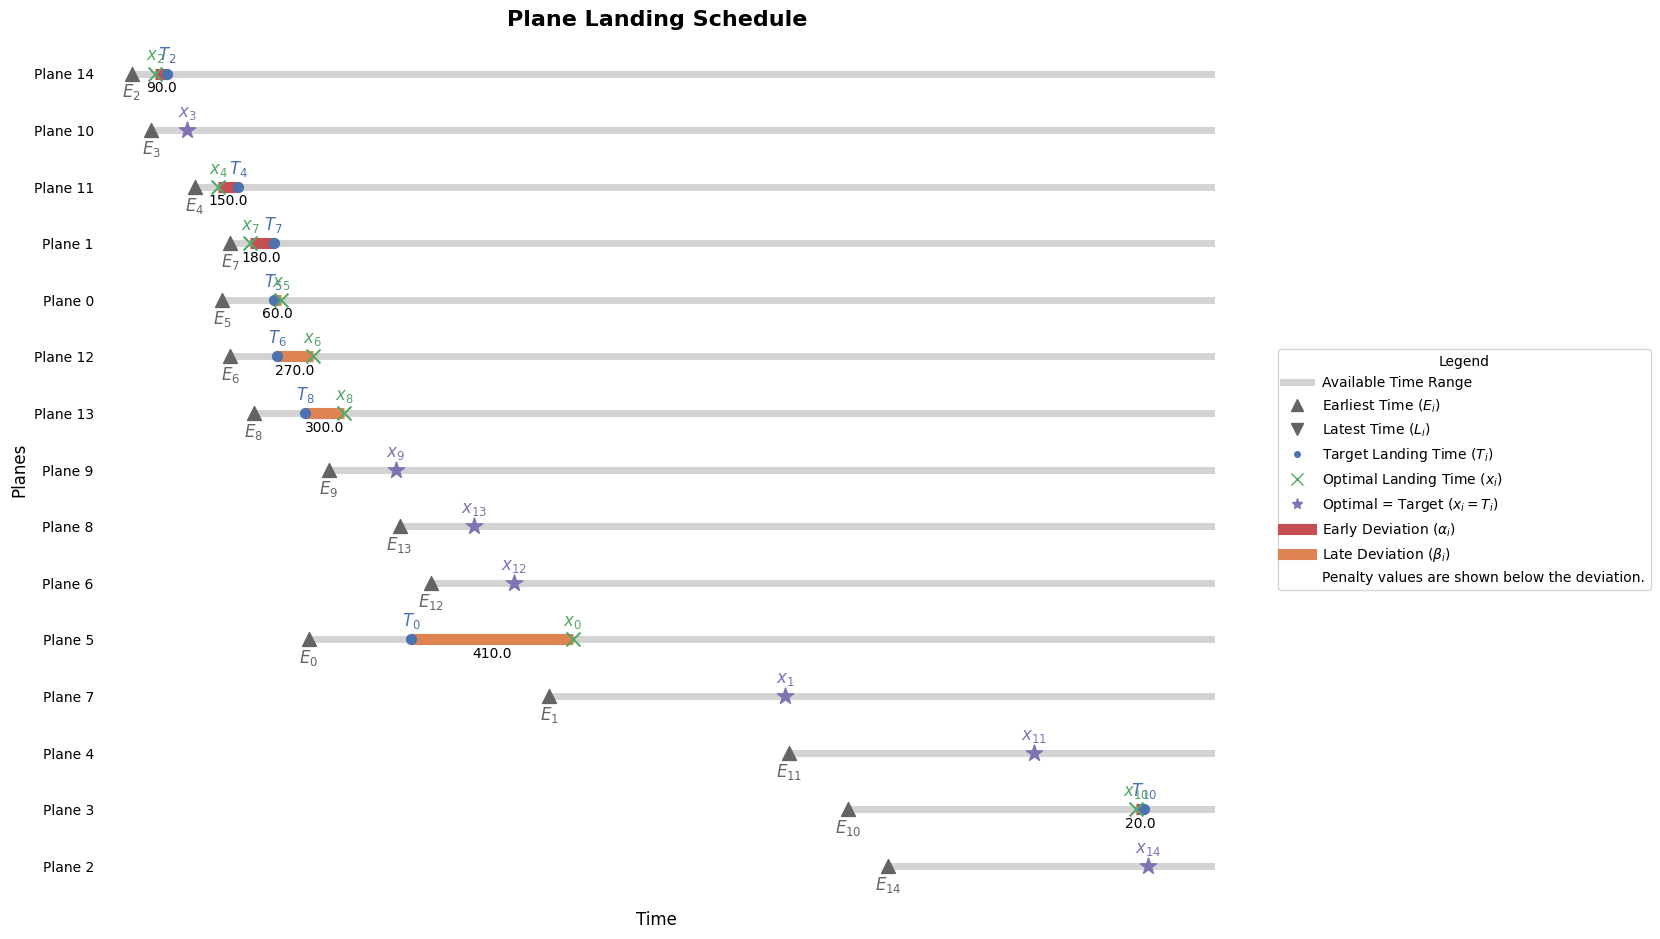

In [6]:
solver, model, variables = solve_single_runway_cp(
    num_planes, planes_data, separation_times, decision_strategies_single, hint=True
)
metrics_CP_single_runway = performance_CP(solver, model, planes_data)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		    Creating MIP Solver

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving MIP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196.0 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90.0 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106.0 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114.0 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 138.0 | Target Time: 121 | Penalty: 510.0
  -> Plane 7: 122.0 | Target Time: 120 | Penalty: 60.0
  -> Plane 8: 130.0 | Target Time: 128 | Penalty: 60.0
  -> Plane 14: 344.0 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for MIP

-> Execution time: 0.17 seconds
-> Number of variables in the model: 255
-> Number of constraints in the model: 420
-> Total penalty: 1480.0



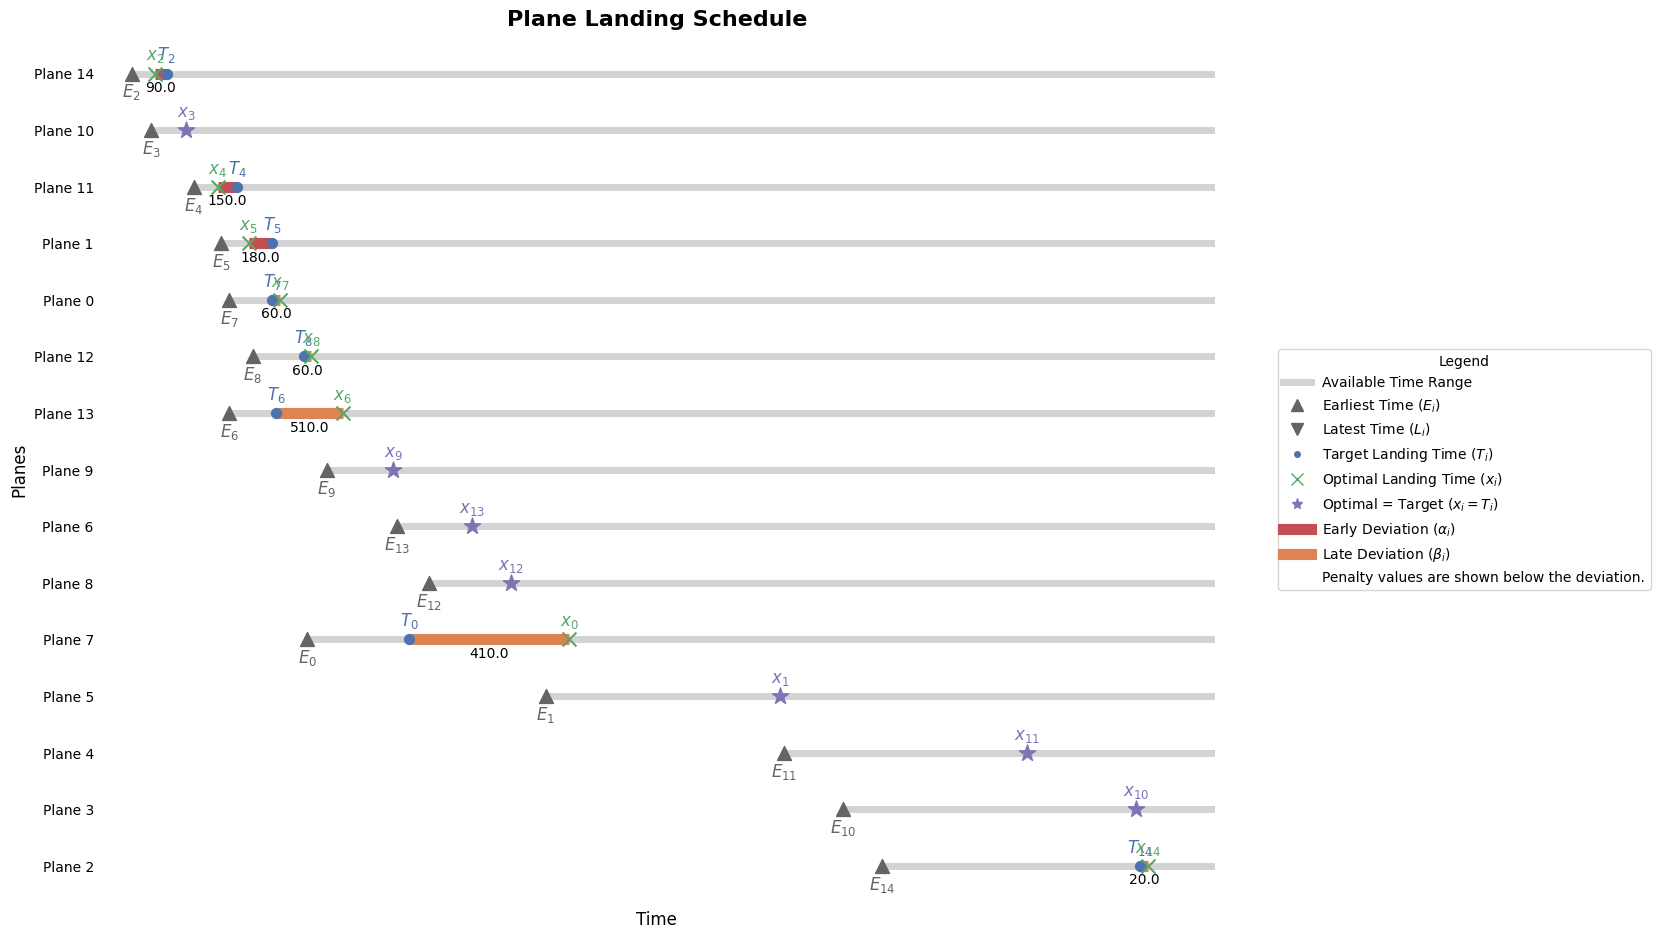

In [7]:
solver, variables = solve_single_runway_mip(num_planes, planes_data, separation_times)
metrics_MIP_single_runway = performance_MIP(solver)

visualize_solution(solver, num_planes, planes_data, variables, approach="MIP")

In [8]:
solver = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver)

		    Creating MIP Solver

-> Number of decision variables created: 495
-> Number of constraints: 750

			Solving MIP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 113.0 | Target Time: 120 | Penalty: 210.0

		Performance Metrics for MIP

-> Execution time: 0.03 seconds
-> Number of variables in the model: 495
-> Number of constraints in the model: 750
-> Total penalty: 210.0



## **Hints**

In [9]:
file_numbers = range(1, 9)

DEFAULT_BRANCHING_STRATEGY = "DEFAULT"
DEFAULT_VARIABLE_STRATEGY = "DEFAULT"
DEFAULT_VALUE_STRATEGY = "DEFAULT"

# Initialize the results list
results = []

# Iterate through each file for both multiple and single runways
for file_num in tqdm(file_numbers, desc="Processing Files"):
    filename = f"data/airland{file_num}.txt"

    # Read the data from the file
    num_planes, planes_data, separation_times = read_data(filename)

    approaches = ["MIP", "CP"]
    runway_scenarios = ['multiple', 'single']
    hints = [True, False]

    for approach in approaches:
        for hint in hints:
            for runway_type in runway_scenarios:
                num_runs = 5

                # Initialize accumulators for metrics
                sum_metrics = {}
                count_success = 0
                # run_errors = []
                # non_numeric_metrics = set()

                for run in range(1, num_runs + 1):
                    print(f"  Run {run} of {num_runs}...")

                    metrics = {}

                    if approach == "MIP":
                        if runway_type == "multiple":
                            solver = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times, hint=hint)
                        else:
                            solver, variables = solve_single_runway_mip(num_planes, planes_data, separation_times, hint=hint)

                        metrics = performance_MIP(solver)

                    else:
                        if runway_type == "multiple":
                            solver, model = solve_multiple_runways_cp(
                                num_planes,
                                num_runways,
                                planes_data,
                                separation_times,
                                hint=hint,
                            )
                        else:
                            solver, model, variables = solve_single_runway_cp(
                                num_planes, planes_data, separation_times, hint=hint
                            )

                        metrics = performance_CP(solver, model, planes_data)

                    # Accumulate the metrics
                    for key, value in metrics.items():
                        if isinstance(value, (int, float)):
                            sum_metrics[key] = sum_metrics.get(key, 0) + value
                        # else:
                        #     # Log non-numeric metrics
                        #     non_numeric_metrics.add(key)

                    count_success += 1

                # Calculate the average of the metrics if at least one run was successful
                if count_success > 0:
                    average_metrics = {
                        key: value / count_success for key, value in sum_metrics.items()
                    }

                    if approach == "MIP":
                        average_metrics["conflicts"] = "NOT APPLICABLE"
                        average_metrics["branches"] = "NOT APPLICABLE"

                    # Store the results with the strategy details and average metrics
                    result = {
                        "file_name": filename,
                        "approach": approach,
                        "runway_type": runway_type,
                        "branching_strategy": DEFAULT_BRANCHING_STRATEGY,
                        "variable_strategy": DEFAULT_VARIABLE_STRATEGY,
                        "value_strategy": DEFAULT_VALUE_STRATEGY,
                        "hint": hint,
                        "runs_successful": count_success,
                        "runs_failed": num_runs - count_success,
                    }

                    result.update(
                        average_metrics
                    )  # Add the averaged metrics to the result dictionary

                    # # Optionally, include details of any errors that occurred
                    # if run_errors:
                    #     result["errors"] = "; ".join(run_errors)

                    # # Optionally, include non-numeric metrics
                    # if non_numeric_metrics:
                    #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

                    results.append(result)
                else:
                    # All runs failed for this combination
                    error_result = {
                        "file_name": filename,
                        "runway_type": runway_type,
                        "branching_strategy": DEFAULT_BRANCHING_STRATEGY,
                        "variable_strategy": DEFAULT_VARIABLE_STRATEGY,
                        "value_strategy": DEFAULT_VALUE_STRATEGY,
                        "hint": hint,
                        "runs_successful": 0,
                        "runs_failed": num_runs,
                        "errors": "All runs failed.",
                    }
                    results.append(error_result)

Processing Files:   0%|          | 0/8 [00:00<?, ?it/s]

	       Reading data from airland1.txt

-> Number of planes: 10 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 230
-> Number of constraints: 350

			Solving MIP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 132.0 | Target Time: 135 | Penalty: 90.0

		Performance Metrics for MIP

-> Execution time: 0.16 seconds
-> Number of variables in the model: 230
-> Number of constraints in the model: 350
-> Total penalty: 90.0

  Run 2 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 230
-> Number of constraints: 350

			Solving MIP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 133.0 | Target Time: 135 | Penalty: 60.0
  -> Plane 7: 141.0 | Target Time: 140 | Penalty: 30.0

		Performance Metrics for MIP

-> Execution time: 0.05 seconds
-> Number of variables in the model: 230
-> Number of constraints in the model: 350
-> Total penalty: 90.0

  Run 3 of 5.

Processing Files:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it]

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.03
-> Number of variables: 85
-> Number of constraints: 241
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 66
-> Best objective bound: 700.0

  Run 3 of 5...
		     Creating CP model

-> Number of decision variables created: 85
-> Number of constraints: 241

			Solving CP

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Plane 

Processing Files:  25%|██▌       | 2/8 [00:05<00:17,  2.93s/it]

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.13
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 50
-> Number of Branches: 2361
-> Best objective bound: 1480.0

  Run 5 of 5...
		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> P

Processing Files:  38%|███▊      | 3/8 [00:08<00:14,  2.97s/it]

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 141 | Target Time: 132 | Penalty: 270.0
  -> Plane 9: 133 | Target Time: 130 | Penalty: 90.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 16: 339 | Target Time: 338 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.07
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 20
-> Number of Branches: 2252
-> Best objective bound: 820.0

	       Reading data from airland4.txt

-> Number of planes: 20 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 860
-> Number of constraints: 1300

			Solving MIP

-> Optimal Cost: 640.0

-> Planes that did not land on the target time:
  -> Plane 0: 90.0 | Target Time: 92 | Penalty: 60.0
  -> Plane 2: 187.0 | Target Time: 183 | Penal

Processing Files:  50%|█████     | 4/8 [00:21<00:27,  6.80s/it]

-> Optimal Cost: 2520.0

-> Planes that did not land on the target time:
  -> Plane 0: 82 | Target Time: 92 | Penalty: 300.0
  -> Plane 1: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 2: 201 | Target Time: 183 | Penalty: 180.0
  -> Plane 5: 122 | Target Time: 117 | Penalty: 150.0
  -> Plane 6: 130 | Target Time: 118 | Penalty: 360.0
  -> Plane 7: 114 | Target Time: 116 | Penalty: 60.0
  -> Plane 8: 106 | Target Time: 112 | Penalty: 180.0
  -> Plane 11: 154 | Target Time: 156 | Penalty: 60.0
  -> Plane 12: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 14: 178 | Target Time: 174 | Penalty: 120.0
  -> Plane 15: 146 | Target Time: 156 | Penalty: 300.0
  -> Plane 17: 186 | Target Time: 169 | Penalty: 510.0
  -> Plane 18: 162 | Target Time: 168 | Penalty: 180.0

		Performance Metrics for CP

-> Execution time (s): 0.23
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 20
-> Number of Branches: 2253
-> Best objective bound: 25

Processing Files:  62%|██████▎   | 5/8 [01:00<00:55, 18.52s/it]

-> Optimal Cost: 3100.0

-> Planes that did not land on the target time:
  -> Plane 0: 201 | Target Time: 155 | Penalty: 460.0
  -> Plane 2: 82 | Target Time: 90 | Penalty: 240.0
  -> Plane 3: 90 | Target Time: 94 | Penalty: 120.0
  -> Plane 4: 98 | Target Time: 105 | Penalty: 210.0
  -> Plane 5: 114 | Target Time: 112 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 112 | Penalty: 540.0
  -> Plane 7: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 8: 122 | Target Time: 117 | Penalty: 150.0
  -> Plane 9: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 12: 178 | Target Time: 161 | Penalty: 510.0
  -> Plane 13: 146 | Target Time: 151 | Penalty: 150.0
  -> Plane 16: 170 | Target Time: 159 | Penalty: 330.0
  -> Plane 18: 154 | Target Time: 153 | Penalty: 30.0
  -> Plane 19: 186 | Target Time: 182 | Penalty: 120.0

		Performance Metrics for CP

-> Execution time (s): 1.87
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 20
->

Processing Files:  75%|███████▌  | 6/8 [01:03<00:26, 13.44s/it]

-> Optimal Cost: 554.0

-> Planes that did not land on the target time:
  -> Plane 2: 175 | Target Time: 144 | Penalty: 124.0
  -> Plane 4: 271 | Target Time: 264 | Penalty: 28.0
  -> Plane 9: 810 | Target Time: 766 | Penalty: 132.0
  -> Plane 13: 1276 | Target Time: 1106 | Penalty: 170.0
  -> Plane 18: 1738 | Target Time: 1715 | Penalty: 92.0
  -> Plane 21: 2170 | Target Time: 2168 | Penalty: 8.0

		Performance Metrics for CP

-> Execution time (s): 0.33
-> Number of variables: 1020
-> Number of constraints: 2791
-> Solution Status: OPTIMAL
-> Number of Conflicts: 12
-> Number of Branches: 4783
-> Best objective bound: 554.0

  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 555
-> Number of constraints: 1921

			Solving CP

-> Optimal Cost: 24442.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 79 | Penalty: 68.0
  -> Plane 2: 192 | Target Time: 144 | Penalty: 192.0
  -> Plane 3: 392 | Target Time: 204 | Penalty: 564.

Processing Files:  88%|████████▊ | 7/8 [01:11<00:11, 11.44s/it]

-> Number of decision variables created: 1122
-> Number of constraints: 4049

			Solving CP

-> Optimal Cost: 1550.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 137 | Penalty: 82.0
  -> Plane 2: 296 | Target Time: 271 | Penalty: 25.0
  -> Plane 3: 376 | Target Time: 351 | Penalty: 25.0
  -> Plane 4: 456 | Target Time: 431 | Penalty: 25.0
  -> Plane 5: 528 | Target Time: 503 | Penalty: 50.0
  -> Plane 6: 624 | Target Time: 626 | Penalty: 4.0
  -> Plane 7: 720 | Target Time: 727 | Penalty: 14.0
  -> Plane 8: 920 | Target Time: 895 | Penalty: 25.0
  -> Plane 9: 992 | Target Time: 967 | Penalty: 50.0
  -> Plane 10: 1192 | Target Time: 1167 | Penalty: 25.0
  -> Plane 11: 1264 | Target Time: 1239 | Penalty: 50.0
  -> Plane 12: 1464 | Target Time: 1439 | Penalty: 25.0
  -> Plane 13: 1544 | Target Time: 1519 | Penalty: 25.0
  -> Plane 14: 1616 | Target Time: 1591 | Penalty: 50.0
  -> Plane 15: 1816 | Target Time: 1791 | Penalty: 25.0
  -> Plane 16: 1896 | T

Processing Files: 100%|██████████| 8/8 [02:23<00:00, 17.95s/it]

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 136 | Target Time: 132 | Penalty: 120.0
  -> Plane 9: 133 | Target Time: 130 | Penalty: 90.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 521 | Penalty: 75.0
  -> Plane 30: 688 | Target Time: 674 | Penalty: 210.0
  -> Plane 33: 556 | Target Time: 562 | Penalty: 60.0
  -> Plane 34: 407 | Target Time: 412 | Penalty: 75.0
  -> Plane 37: 571 | Target Time: 572 | Penalty: 20.0
  -> P

In [10]:
# Convert results to a DataFrame
df_results1 = pd.DataFrame(results)
df_results1.head(10)

,file_name,approach,runway_type,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,best_objective,conflicts,branches
0,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.050800,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
1,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.018800,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
2,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.014600,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
3,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.025400,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
4,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.019077,140.0,331.0,90.0,6.8,361.6
5,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.025475,85.0,241.0,700.0,1.2,184.0
6,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.018788,140.0,331.0,90.0,20.0,832.6
7,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.027397,85.0,241.0,700.0,1.2,194.6
8,data/airland2.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.020800,495.0,750.0,210.0,NOT APPLICABLE,NOT APPLICABLE
9,data/airland2.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.131000,255.0,420.0,1480.0,NOT APPLICABLE,NOT APPLICABLE


## Single Runway

In [11]:
# # Mapping strategies to their corresponding names
# branching_strategies = [
#     (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
#     (cp_model.LP_SEARCH, "LP_SEARCH"),
#     (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
# ]

# variables_strategies = [
#     (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
#     (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
# ]

# values_strategies = [
#     (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
#     (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
# ]

# # Number of runs per combination (similar to cross-validation)
# num_runs = 5

# # Prepare to store the results
# results_cp_single = []

# # Generate all possible combinations of strategies
# all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# # Iterate over each combination of strategies
# for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
#     print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")

#     # Configure the decision strategies for a single runway
#     decision_strategies_single = [
#         {
#             "variables": "position",  # Replace with your actual variable name
#             "variable_strategy": var_strategy,
#             "value_strategy": val_strategy
#         },
#         # Add more dictionaries if there are additional variables to configure
#         # Example:
#         # {
#         #     "variables": "another_variable",
#         #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
#         #     "value_strategy": cp_model.SELECT_MIN_VALUE
#         # }
#     ]

#     # Initialize accumulators for metrics
#     sum_metrics = {}
#     count_success = 0
#     # run_errors = []
#     # non_numeric_metrics = set()

#     # Execute multiple runs for the same combination
#     for run in range(1, num_runs + 1):
#         print(f"  Run {run} of {num_runs}...")
#         try:
#             solver, model, variables = solve_single_runway_cp(
#                 num_planes,
#                 planes_data,
#                 separation_times,
#                 decision_strategies=decision_strategies_single,
#                 search_strategy=branching_strategy,
#             )

#             # Retrieve performance metrics
#             metrics = performance_CP(solver, model, planes_data)

#             # Accumulate the metrics
#             for key, value in metrics.items():
#                 if isinstance(value, (int, float)):
#                     if key in sum_metrics:
#                         sum_metrics[key] += value
#                     else:
#                         sum_metrics[key] = value
#                 # else:
#                 #     # Log non-numeric metrics
#                 #     non_numeric_metrics.add(key)

#             count_success += 1
#         except Exception as e:
#             error_message = f"Run {run} failed: {str(e)}"
#             print(f"    Error: {error_message}")
#             # run_errors.append(error_message)

#     # Calculate the average of the metrics if at least one run was successful
#     if count_success > 0:
#         average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

#         # Store the results with the strategy details and average metrics
#         result = {
#             "approach": "CP",
#             "branching_strategy": branching_name,
#             "variable_strategy": var_name,
#             "value_strategy": val_name,
#             "hint": False,
#             "runs_successful": count_success,
#             "runs_failed": num_runs - count_success,
#         }
#         result.update(average_metrics)  # Add the averaged metrics to the result dictionary

#         # # Optionally, include details of any errors that occurred
#         # if run_errors:
#         #     result["errors"] = "; ".join(run_errors)

#         # # Optionally, include non-numeric metrics
#         # if non_numeric_metrics:
#         #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

#         results_cp_single.append(result)
#     else:
#         # All runs failed for this combination
#         error_result = {
#             "approach": "CP",
#             "branching_strategy": branching_name,
#             "variable_strategy": var_name,
#             "value_strategy": val_name,
#             "hint": False,
#             "runs_successful": 0,
#             "runs_failed": num_runs,
#             "error": "All runs failed.",
#         }
#         results_cp_single.append(error_result)

# # Optional: Print the averaged results for verification
# print("\nAveraged Results for All Combinations (Single Runway):")
# for res in results_cp_single:
#     print(res)

# Multiple Runway

In [12]:
# # Mapping strategies to their corresponding names
# branching_strategies = [
#     (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
#     (cp_model.LP_SEARCH, "LP_SEARCH"),
#     (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
# ]

# variables_strategies = [
#     (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
#     (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
# ]

# values_strategies = [
#     (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
#     (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
# ]

# # Number of runs per combination (similar to cross-validation)
# num_runs = 5

# # Prepare to store the results
# results_cp_multiple = []

# # Generate all possible combinations of strategies
# all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# # Iterate over each combination of strategies
# for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
#     print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")

#     # Configure the decision strategies for multiple runways
#     # Adjust the "variables" field based on your actual decision variables
#     decision_strategies_multiple = [
#         {
#             "variables": "position",  # Replace with your actual variable name
#             "variable_strategy": var_strategy,
#             "value_strategy": val_strategy
#         },
#         # Add more dictionaries if there are additional variables to configure
#         # Example:
#         # {
#         #     "variables": "another_variable",
#         #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
#         #     "value_strategy": cp_model.SELECT_MIN_VALUE
#         # }
#     ]

#     # Initialize accumulators for metrics
#     sum_metrics = {}
#     count_success = 0
#     # run_errors = []
#     # non_numeric_metrics = set()

#     # Execute multiple runs for the same combination
#     for run in range(1, num_runs + 1):
#         print(f"  Run {run} of {num_runs}...")
#         try:
#             solver, model = solve_multiple_runways_cp(
#                 num_planes,
#                 num_runways,
#                 planes_data,
#                 separation_times,
#                 decision_strategies=decision_strategies_multiple,
#                 search_strategy=branching_strategy,
#             )

#             # Retrieve performance metrics
#             metrics = performance_CP(solver, model, planes_data)

#             # Accumulate the metrics
#             for key, value in metrics.items():
#                 if isinstance(value, (int, float)):
#                     if key in sum_metrics:
#                         sum_metrics[key] += value
#                     else:
#                         sum_metrics[key] = value
#                 # else:
#                 #     # Log non-numeric metrics
#                 #     non_numeric_metrics.add(key)

#             count_success += 1
#         except Exception as e:
#             error_message = f"Run {run} failed: {str(e)}"
#             print(f"    Error: {error_message}")
#             # run_errors.append(error_message)

#     # Calculate the average of the metrics if at least one run was successful
#     if count_success > 0:
#         average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

#         # Store the results with the strategy details and average metrics
#         result = {
#             "approach": "CP",
#             "branching_strategy": branching_name,
#             "variable_strategy": var_name,
#             "value_strategy": val_name,
#             "hint": False,
#             "runs_successful": count_success,
#             "runs_failed": num_runs - count_success,
#         }
#         result.update(average_metrics)  # Add the averaged metrics to the result dictionary

#         # # Optionally, include details of any errors that occurred
#         # if run_errors:
#         #     result["errors"] = "; ".join(run_errors)

#         # # Optionally, include non-numeric metrics
#         # if non_numeric_metrics:
#         #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

#         results_cp_multiple.append(result)
#     else:
#         # All runs failed for this combination
#         error_result = {
#             "approach": "CP",
#             "branching_strategy": branching_name,
#             "variable_strategy": var_name,
#             "value_strategy": val_name,
#             "hint": False,
#             "runs_successful": 0,
#             "runs_failed": num_runs,
#             "error": "All runs failed.",
#         }
#         results_cp_multiple.append(error_result)

# # Optional: Print the averaged results for verification
# print("\nAveraged Results for All Combinations (Multiple Runways):")
# for res in results_cp_multiple:
#     print(res)

# Dataframe

In [13]:
# # -------------------------------
# # Step 1: Convert Lists to DataFrames
# # -------------------------------

# # Convert results_cp_multiple to a DataFrame
# df_cp_multiple = pd.DataFrame(results_cp_multiple)

# # Convert results_cp_single to a DataFrame
# df_cp_single = pd.DataFrame(results_cp_single)

# # -------------------------------
# # Step 2: Add 'runway_type' Column
# # -------------------------------

# # Add a new column 'runway_type' to indicate the scenario
# df_cp_multiple['runway_type'] = 'multiple'
# df_cp_single['runway_type'] = 'single'

# # -------------------------------
# # Step 3: Combine Both DataFrames
# # -------------------------------

# # Combine the two DataFrames into one
# combined_df = pd.concat([df_cp_multiple, df_cp_single], ignore_index=True)

# # Optional: Reorder columns to place 'runway_type' first for clarity
# cols = ['approach', 'runway_type'] + [col for col in combined_df.columns if col != 'runway_type' and col != 'approach']
# combined_df = combined_df[cols]

# # -------------------------------
# # Step 4: Inspect the DataFrames
# # -------------------------------

# # Print the first few rows of the multiple runways DataFrame
# print("Sample of Multiple Runways Results:")
# print(df_cp_multiple.head())

# # Print the first few rows of the single runway DataFrame
# print("\nSample of Single Runway Results:")
# print(df_cp_single.head())

# # Print the first few rows of the combined DataFrame
# print("\nSample of Combined Runway Results:")
# print(combined_df.head())


# Multiple files 

In [14]:
file_numbers = range(1, 9) 

branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Initialize the results list
results = []


# Iterate through each file for both multiple and single runways
for file_num in tqdm(file_numbers, desc="Processing Files"):
    filename = f"data/airland{file_num}.txt"

    # Read the data from the file
    num_planes, planes_data, separation_times = read_data(filename)

    # Define runway scenarios: multiple and single
    runway_scenarios = ['multiple', 'single']

    for runway_type in runway_scenarios:
        # Select appropriate solver function based on runway_type
        if runway_type == 'multiple':
            solve_cp = solve_multiple_runways_cp
            num_runways = 2  # Example value; adjust as needed
        else:
            solve_cp = solve_single_runway_cp
            num_runways = 1  # Single runway

        # Iterate through all strategy combinations
        for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in itertools.product(
            branching_strategies, variables_strategies, values_strategies
        ):
            # Print current combination and file being processed
            print(f"\nTesting combination ({runway_type.capitalize()} Runways): Branching={branching_name}, Variable={var_name}, Value={val_name} on {filename}")

            # Configure the decision strategies based on runway type
            decision_strategies = [
                {
                    "variables": "position",  # Replace with your actual variable name
                    "variable_strategy": var_strategy,
                    "value_strategy": val_strategy
                },
                # Add more dictionaries if there are additional variables to configure
            ]

            # Initialize accumulators for metrics
            sum_metrics = {}
            count_success = 0
            # run_errors = []
            # non_numeric_metrics = set()

            # Execute multiple runs for the same combination
            for run in range(1, num_runs + 1):
                print(f"  Run {run} of {num_runs}...")
                try:
                    # Call your solver function
                    if runway_type == 'multiple':
                        solver, model = solve_cp(
                            num_planes,
                            num_runways,
                            planes_data,
                            separation_times,
                            decision_strategies=decision_strategies,
                            search_strategy=branching_strategy,
                        )
                    else:
                        solver, model, variables = solve_cp(
                            num_planes,
                            planes_data=planes_data,
                            separation_times=separation_times,
                            decision_strategies=decision_strategies,
                            search_strategy=branching_strategy,
                        )

                    # Retrieve performance metrics
                    metrics = performance_CP(solver, model, planes_data)

                    # Accumulate the metrics
                    for key, value in metrics.items():
                        if isinstance(value, (int, float)):
                            sum_metrics[key] = sum_metrics.get(key, 0) + value
                        # else:
                        #     # Log non-numeric metrics
                        #     non_numeric_metrics.add(key)

                    count_success += 1
                except Exception as e:
                    error_message = f"Run {run} failed: {str(e)}"
                    print(f"    Error: {error_message}")
                    # run_errors.append(error_message)

            # Calculate the average of the metrics if at least one run was successful
            if count_success > 0:
                average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

                # Store the results with the strategy details and average metrics
                result = {
                    "file_name": filename,
                    "approach": "CP",
                    "runway_type": runway_type,
                    "branching_strategy": branching_name,
                    "variable_strategy": var_name,
                    "value_strategy": val_name,
                    "hint": False,
                    "runs_successful": count_success,
                    "runs_failed": num_runs - count_success,
                }
                result.update(average_metrics)  # Add the averaged metrics to the result dictionary

                # # Optionally, include details of any errors that occurred
                # if run_errors:
                #     result["errors"] = "; ".join(run_errors)

                # # Optionally, include non-numeric metrics
                # if non_numeric_metrics:
                #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

                results.append(result)
            else:
                # All runs failed for this combination
                error_result = {
                    "file_name": filename,
                    "approach": "CP",
                    "runway_type": runway_type,
                    "branching_strategy": branching_name,
                    "variable_strategy": var_name,
                    "value_strategy": val_name,
                    "hint": False,
                    "runs_successful": 0,
                    "runs_failed": num_runs,
                    "errors": "All runs failed.",
                }
                results.append(error_result)

Processing Files:   0%|          | 0/8 [00:00<?, ?it/s]

	       Reading data from airland1.txt

-> Number of planes: 10 


Testing combination (Multiple Runways): Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF on data/airland1.txt
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 140
-> Number of constraints: 331

			Solving CP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 134 | Target Time: 135 | Penalty: 30.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.02
-> Number of variables: 140
-> Number of constraints: 331
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 0
-> Best objective bound: 90.0

  Run 2 of 5...
		     Creating CP model

-> Number of decision variables created: 140
-> Number of constraints: 331

			Solving CP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 132 | Target Time: 135 | Penalty

Processing Files:  12%|█▎        | 1/8 [00:03<00:22,  3.21s/it]

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.03
-> Number of variables: 85
-> Number of constraints: 241
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 0
-> Best objective bound: 700.0


Testing combination (Single Runways): Branching=PSEUDO_COST_SEARCH, Variable=CHOOSE_MAX_DOMAIN_SIZE, Value=SELECT_UPPER_HALF on data/airland1.txt
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 85
-> Number of constraints: 241

			Solving CP

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target 

Processing Files:  25%|██▌       | 2/8 [00:29<01:42, 17.05s/it]

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 130 | Target Time: 120 | Penalty: 300.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.25
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 226
-> Best objective bound: 1480.0

  Run 5 of 5...
		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Pla

Processing Files:  38%|███▊      | 3/8 [00:43<01:16, 15.26s/it]

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 5: 101 | Target Time: 106 | Penalty: 150.0
  -> Plane 7: 109 | Target Time: 108 | Penalty: 30.0
  -> Plane 8: 133 | Target Time: 132 | Penalty: 30.0
  -> Plane 9: 141 | Target Time: 130 | Penalty: 330.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 16: 339 | Target Time: 338 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.09
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 20
-> Number of Branches: 2252
-> Best objective bound: 820.0

  Run 4 of 5...
		     Creating CP model

-> Number of decision variables created: 270
-> Number of constraints: 881

			Solving CP

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Pla

Processing Files:  50%|█████     | 4/8 [01:22<01:39, 24.99s/it]

-> Optimal Cost: 2520.0

-> Planes that did not land on the target time:
  -> Plane 0: 82 | Target Time: 92 | Penalty: 300.0
  -> Plane 1: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 2: 201 | Target Time: 183 | Penalty: 180.0
  -> Plane 5: 122 | Target Time: 117 | Penalty: 150.0
  -> Plane 6: 130 | Target Time: 118 | Penalty: 360.0
  -> Plane 7: 114 | Target Time: 116 | Penalty: 60.0
  -> Plane 8: 106 | Target Time: 112 | Penalty: 180.0
  -> Plane 11: 146 | Target Time: 156 | Penalty: 300.0
  -> Plane 12: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 14: 178 | Target Time: 174 | Penalty: 120.0
  -> Plane 15: 154 | Target Time: 156 | Penalty: 60.0
  -> Plane 16: 186 | Target Time: 170 | Penalty: 480.0
  -> Plane 17: 170 | Target Time: 169 | Penalty: 30.0
  -> Plane 18: 162 | Target Time: 168 | Penalty: 180.0

		Performance Metrics for CP

-> Execution time (s): 0.37
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 20
-

Processing Files:  62%|██████▎   | 5/8 [03:12<02:46, 55.35s/it]

-> Optimal Cost: 3100.0

-> Planes that did not land on the target time:
  -> Plane 0: 201 | Target Time: 155 | Penalty: 460.0
  -> Plane 2: 82 | Target Time: 90 | Penalty: 240.0
  -> Plane 3: 90 | Target Time: 94 | Penalty: 120.0
  -> Plane 4: 98 | Target Time: 105 | Penalty: 210.0
  -> Plane 5: 114 | Target Time: 112 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 112 | Penalty: 540.0
  -> Plane 7: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 8: 122 | Target Time: 117 | Penalty: 150.0
  -> Plane 9: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 12: 178 | Target Time: 161 | Penalty: 510.0
  -> Plane 13: 146 | Target Time: 151 | Penalty: 150.0
  -> Plane 16: 162 | Target Time: 159 | Penalty: 90.0
  -> Plane 17: 170 | Target Time: 162 | Penalty: 240.0
  -> Plane 18: 154 | Target Time: 153 | Penalty: 30.0
  -> Plane 19: 186 | Target Time: 182 | Penalty: 120.0

		Performance Metrics for CP

-> Execution time (s): 1.85
-> Number of variables: 270
-> Number of constraints: 881
-> 

Processing Files:  75%|███████▌  | 6/8 [03:36<01:29, 44.86s/it]

-> Number of decision variables created: 555
-> Number of constraints: 1921

			Solving CP

-> Optimal Cost: 24442.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 79 | Penalty: 68.0
  -> Plane 2: 192 | Target Time: 144 | Penalty: 192.0
  -> Plane 3: 392 | Target Time: 204 | Penalty: 564.0
  -> Plane 4: 464 | Target Time: 264 | Penalty: 800.0
  -> Plane 5: 560 | Target Time: 320 | Penalty: 960.0
  -> Plane 6: 760 | Target Time: 528 | Penalty: 696.0
  -> Plane 7: 832 | Target Time: 635 | Penalty: 788.0
  -> Plane 8: 1032 | Target Time: 730 | Penalty: 906.0
  -> Plane 9: 1112 | Target Time: 766 | Penalty: 1038.0
  -> Plane 10: 1184 | Target Time: 790 | Penalty: 1576.0
  -> Plane 11: 1280 | Target Time: 920 | Penalty: 1440.0
  -> Plane 12: 1461 | Target Time: 1046 | Penalty: 830.0
  -> Plane 13: 1591 | Target Time: 1106 | Penalty: 485.0
  -> Plane 14: 1671 | Target Time: 1136 | Penalty: 1605.0
  -> Plane 15: 1751 | Target Time: 1166 | Penalty: 1755.0
  ->

Processing Files:  88%|████████▊ | 7/8 [04:16<00:43, 43.08s/it]

-> Number of decision variables created: 1122
-> Number of constraints: 4049

			Solving CP

-> Optimal Cost: 1550.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 137 | Penalty: 82.0
  -> Plane 2: 296 | Target Time: 271 | Penalty: 25.0
  -> Plane 3: 376 | Target Time: 351 | Penalty: 25.0
  -> Plane 4: 456 | Target Time: 431 | Penalty: 25.0
  -> Plane 5: 528 | Target Time: 503 | Penalty: 50.0
  -> Plane 6: 624 | Target Time: 626 | Penalty: 4.0
  -> Plane 7: 720 | Target Time: 727 | Penalty: 14.0
  -> Plane 8: 920 | Target Time: 895 | Penalty: 25.0
  -> Plane 9: 992 | Target Time: 967 | Penalty: 50.0
  -> Plane 10: 1192 | Target Time: 1167 | Penalty: 25.0
  -> Plane 11: 1264 | Target Time: 1239 | Penalty: 50.0
  -> Plane 12: 1464 | Target Time: 1439 | Penalty: 25.0
  -> Plane 13: 1544 | Target Time: 1519 | Penalty: 25.0
  -> Plane 14: 1616 | Target Time: 1591 | Penalty: 50.0
  -> Plane 15: 1816 | Target Time: 1791 | Penalty: 25.0
  -> Plane 16: 1896 | T

Processing Files: 100%|██████████| 8/8 [10:34<00:00, 79.33s/it] 

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 5: 101 | Target Time: 106 | Penalty: 150.0
  -> Plane 7: 109 | Target Time: 108 | Penalty: 30.0
  -> Plane 8: 133 | Target Time: 132 | Penalty: 30.0
  -> Plane 9: 136 | Target Time: 130 | Penalty: 180.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 521 | Penalty: 75.0
  -> Plane 30: 688 | Target Time: 674 | Penalty: 210.0
  -> Plane 33: 556 | Target Time: 562 | Penalty: 60.0
  -> Plane 34: 407 | Target Time: 412 | Penalty: 75.0
  -> Pl

In [15]:
# merge the results
df_results2 = pd.DataFrame(results)
merged_results = pd.concat([df_results1, df_results2], ignore_index=True)

merged_results.head(10)

,file_name,approach,runway_type,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,best_objective,conflicts,branches
0,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.050800,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
1,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.018800,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
2,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.014600,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
3,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.025400,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
4,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.019077,140.0,331.0,90.0,6.8,361.6
5,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.025475,85.0,241.0,700.0,1.2,184.0
6,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.018788,140.0,331.0,90.0,20.0,832.6
7,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.027397,85.0,241.0,700.0,1.2,194.6
8,data/airland2.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.020800,495.0,750.0,210.0,NOT APPLICABLE,NOT APPLICABLE
9,data/airland2.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.131000,255.0,420.0,1480.0,NOT APPLICABLE,NOT APPLICABLE


In [16]:
merged_results.shape

(256, 15)

In [17]:
# Lê os dados do arquivo
filename = "data/airland2.txt"
num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2
num_runs = 5

# Lista para armazenar todas as métricas
all_metrics = []

for run in range(1, num_runs + 1):
    # Modelo de Pista Única
    solver_single, model_single, variables_single = solve_cp_sat_model_single_runway(num_planes, planes_data, separation_times)
    metrics_single = performance_CP(solver_single, model_single, planes_data)
    metrics_single["runway_type"] = "single"
    metrics_single["approach"] = "MIP_CP"
    all_metrics.append(metrics_single)

    # Modelo de Pistas Múltiplas
    solver_multiple, model_multiple = solve_cp_sat_model_multiple_runways(num_planes, num_runways, planes_data, separation_times)
    metrics_multiple = performance_CP(solver_multiple, model_multiple, planes_data)
    metrics_multiple["runway_type"] = "multiple"
    metrics_multiple["approach"] = "MIP_CP"
    all_metrics.append(metrics_multiple)

# Cria um dataframe com todas as execuções
results_df = pd.DataFrame(all_metrics)

# Calcula a média das métricas para cada modelo
averaged_metrics = results_df.groupby("runway_type").mean(numeric_only=True).reset_index()
averaged_metrics["approach"] = "MIP_CP"


	       Reading data from airland2.txt

-> Number of planes: 15 

		    Creating CP-SAT Model

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving CP-SAT Model

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 14: 344 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.14
-> Number of variables: 255
-> Number of constraints: 420
-> Solution Status: OPTIMAL
-> Number of Conflicts: 0
-> Number of Branches: 122
-> Best objective bound: 1480.0

		    Creating CP-SAT Model

-> Number of decision variables created: 49

In [18]:
averaged_metrics.head(10)

,runway_type,exec_time,num_variables,num_constraints,conflicts,branches,best_objective,approach
0,multiple,0.016378,495.0,750.0,0.0,177.6,210.0,MIP_CP
1,single,0.120256,255.0,420.0,0.0,91.6,1480.0,MIP_CP


In [19]:
merged_results.head(10)

,file_name,approach,runway_type,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,best_objective,conflicts,branches
0,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.050800,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
1,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.018800,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
2,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.014600,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
3,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.025400,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
4,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.019077,140.0,331.0,90.0,6.8,361.6
5,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.025475,85.0,241.0,700.0,1.2,184.0
6,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.018788,140.0,331.0,90.0,20.0,832.6
7,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.027397,85.0,241.0,700.0,1.2,194.6
8,data/airland2.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.020800,495.0,750.0,210.0,NOT APPLICABLE,NOT APPLICABLE
9,data/airland2.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,True,5,0,0.131000,255.0,420.0,1480.0,NOT APPLICABLE,NOT APPLICABLE


In [20]:
copy=merged_results 

# Single Runway approaches

plot1_variables= [	exec_time	num_variables	num_constraints	best_objective"]

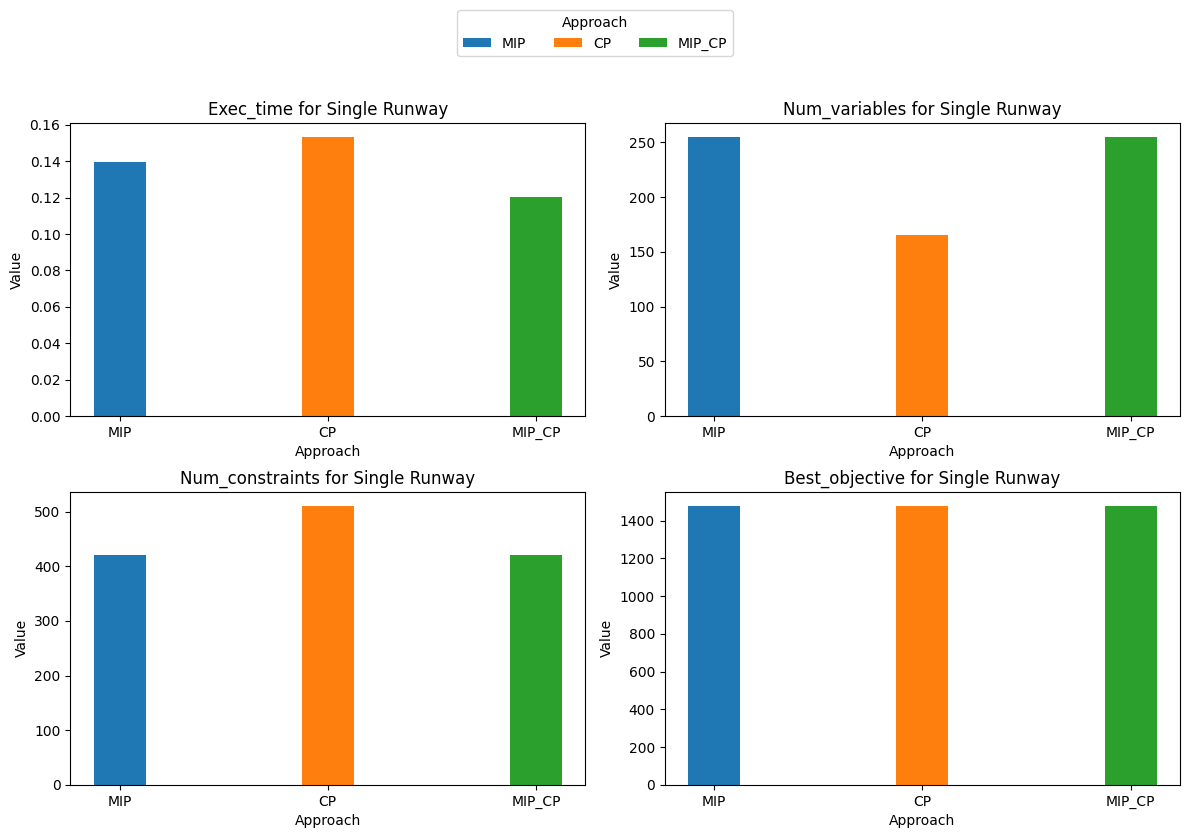

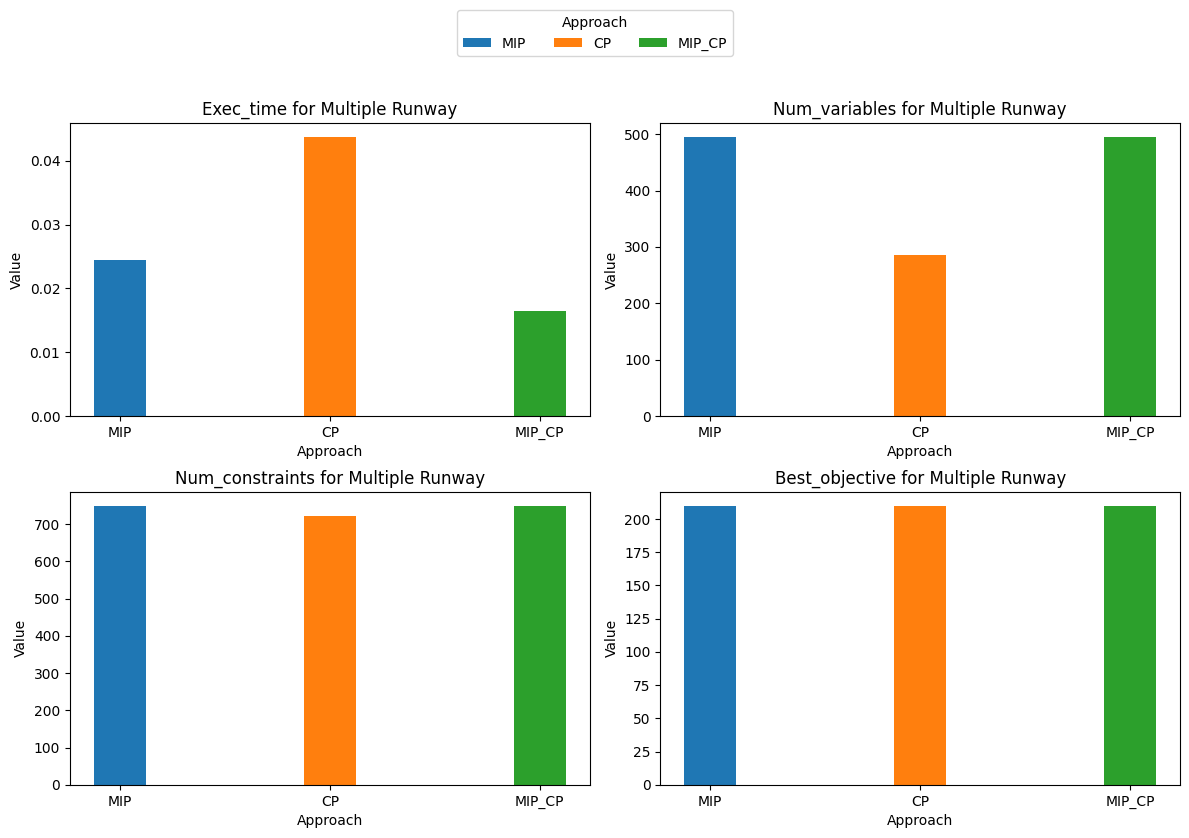

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações iniciais
plot1_variables = ['exec_time', 'num_variables', 'num_constraints', 'best_objective']
runway_types = ['single', 'multiple']
width = 0.25  # Largura das barras

filtered_results = merged_results[
    (merged_results['file_name'] == "data/airland2.txt") &
    (merged_results['branching_strategy'] == "DEFAULT") &
    (merged_results['variable_strategy'] == "DEFAULT") &
    (merged_results['value_strategy'] == "DEFAULT") &
    (merged_results['hint'] == False)
]

# Criar uma grelha para 4 gráficos (um para cada métrica)
for runway_type in runway_types:
    # Filtrar para o tipo de pista atual
    data_filtered = filtered_results[filtered_results['runway_type'] == runway_type]
    data_averaged = averaged_metrics[averaged_metrics['runway_type'] == runway_type]
    
    # Combinar os datasets (merged_results filtrado + averaged_metrics)
    combined_data = pd.concat([data_filtered, data_averaged], ignore_index=True)
    
    # Obter os approaches únicos
    approaches = combined_data['approach'].unique()
    num_approaches = len(approaches)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grelha de gráficos
    axes = axes.flatten()  # Transformar a matriz em uma lista para fácil iteração
    
    # Armazenar handles e labels para criar uma legenda global
    handles = []
    labels = []
    
    for i, variable in enumerate(plot1_variables):
        ax = axes[i]
        x = np.arange(num_approaches)  # Posições no eixo X para cada abordagem
        
        # Adicionar barras para cada abordagem
        for j, approach in enumerate(approaches):
            approach_data = combined_data[combined_data['approach'] == approach][variable].mean()
            bar = ax.bar(x[j], approach_data, width, label=approach)  # Ajuste aqui: x[j]
            
            # Obter handle e label apenas uma vez
            if i == 0:
                handles.append(bar[0])
                labels.append(approach)
        
        # Configurações do gráfico
        ax.set_title(f"{variable.capitalize()} for {runway_type.capitalize()} Runway")
        ax.set_xticks(x)  # Ajuste aqui: x
        ax.set_xticklabels(approaches)
        ax.set_ylabel("Value")
        ax.set_xlabel("Approach")
    
    # Adicionar uma legenda global
    fig.legend(handles, labels, loc='upper center', ncol=len(approaches), bbox_to_anchor=(0.5, 1.05), title="Approach")
    
    # Ajustar layout e exibir
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Ajustar espaço para a legenda global
    plt.show()


Runway Type: single


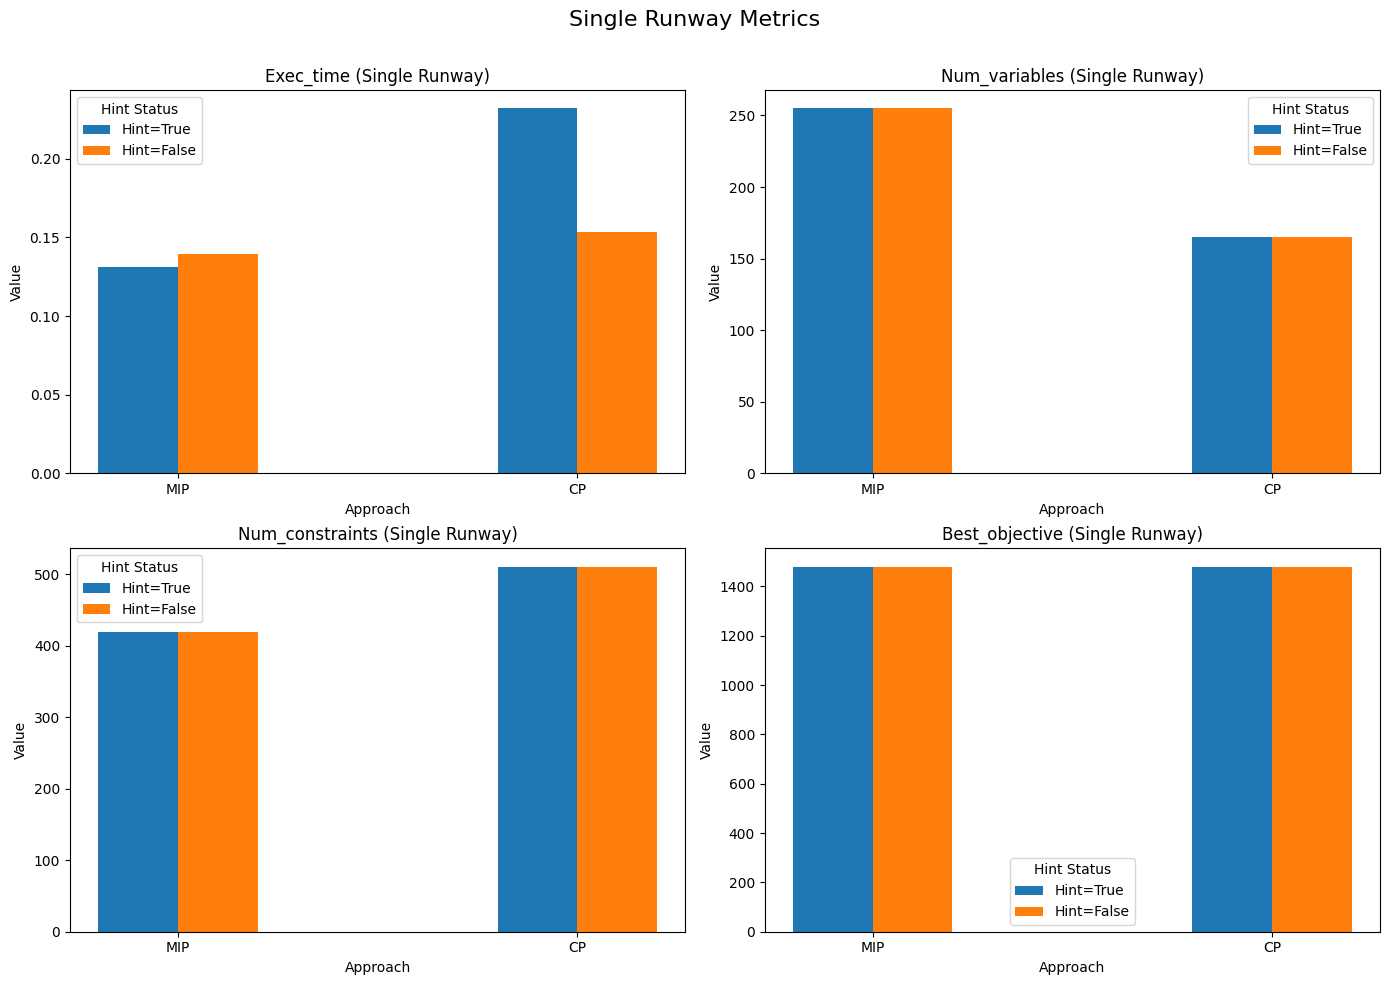


Runway Type: multiple


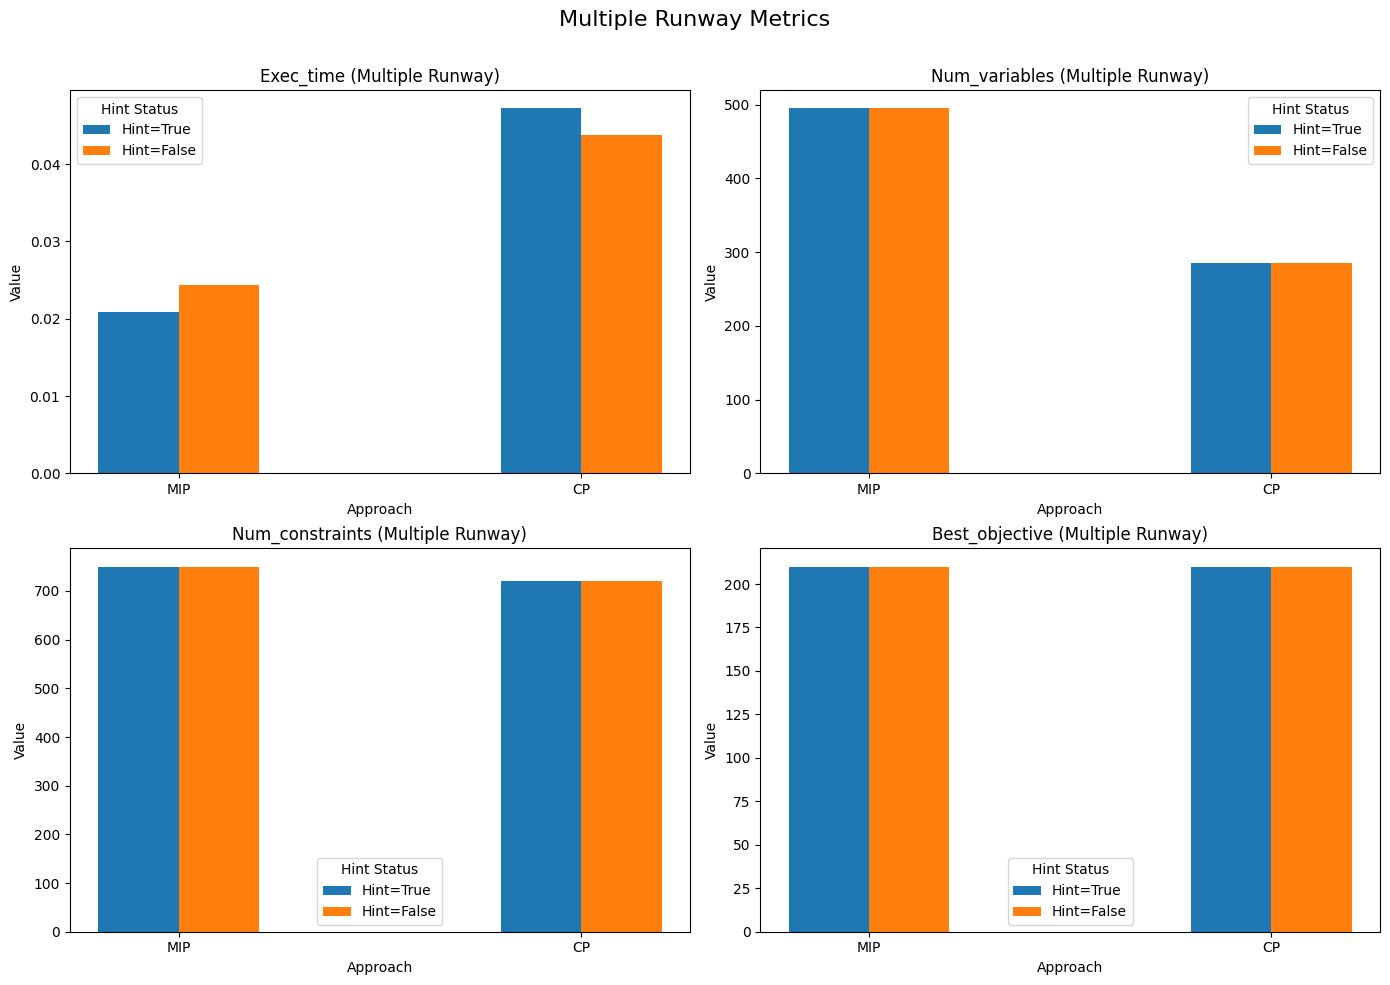

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configurações iniciais
plot1_variables = ['exec_time', 'num_variables', 'num_constraints', 'best_objective']
runway_types = ['single', 'multiple']
approaches = ['MIP', 'CP']
width = 0.2  # Largura das barras

# Filtrar os dados do dataset merged_results
filtered_results = merged_results[
    (merged_results['file_name'] == "data/airland2.txt") &
    (merged_results['branching_strategy'] == "DEFAULT") &
    (merged_results['variable_strategy'] == "DEFAULT") &
    (merged_results['value_strategy'] == "DEFAULT")
]

# Criar gráficos para cada tipo de pista e abordagem em uma grelha
for runway_type in runway_types:
    print(f"\nRunway Type: {runway_type}")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Grelha 2x2
    axes = axes.flatten()  # Converter a matriz de eixos em lista
    
    for j, variable in enumerate(plot1_variables):
        ax = axes[j]
        x = np.arange(len(approaches))  # Posições no eixo X para cada abordagem
        
        # Inicializar listas para as barras
        hint_true_values = []
        hint_false_values = []
        
        for approach in approaches:
            # Filtrar dados para o tipo de pista e abordagem atual
            data_filtered = filtered_results[
                (filtered_results['runway_type'] == runway_type) &
                (filtered_results['approach'] == approach)
            ]
            
            # Separar os dados com hint True e False
            hint_true_data = data_filtered[data_filtered['hint'] == True]
            hint_false_data = data_filtered[data_filtered['hint'] == False]
            
            # Verificar se há dados para hint True e False e adicionar à lista
            if not hint_true_data.empty:
                hint_true_values.append(hint_true_data.iloc[0][variable])
            else:
                hint_true_values.append(0)  # Preencher com zero caso não haja dados
            
            if not hint_false_data.empty:
                hint_false_values.append(hint_false_data.iloc[0][variable])
            else:
                hint_false_values.append(0)  # Preencher com zero caso não haja dados
        
        # Adicionar barras ao gráfico
        ax.bar(x - width / 2, hint_true_values, width, label="Hint=True")
        ax.bar(x + width / 2, hint_false_values, width, label="Hint=False")
        
        # Ajustar as posições dos xticks para o centro das barras
        ax.set_xticks(x)
        ax.set_xticklabels(approaches)
        
        # Configurações do subplot
        ax.set_title(f"{variable.capitalize()} ({runway_type.capitalize()} Runway)")
        ax.set_ylabel("Value")
        ax.set_xlabel("Approach")
        ax.legend(title="Hint Status")
    
    # Ajustar layout e exibir a grelha
    plt.tight_layout()
    fig.suptitle(f"{runway_type.capitalize()} Runway Metrics", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()



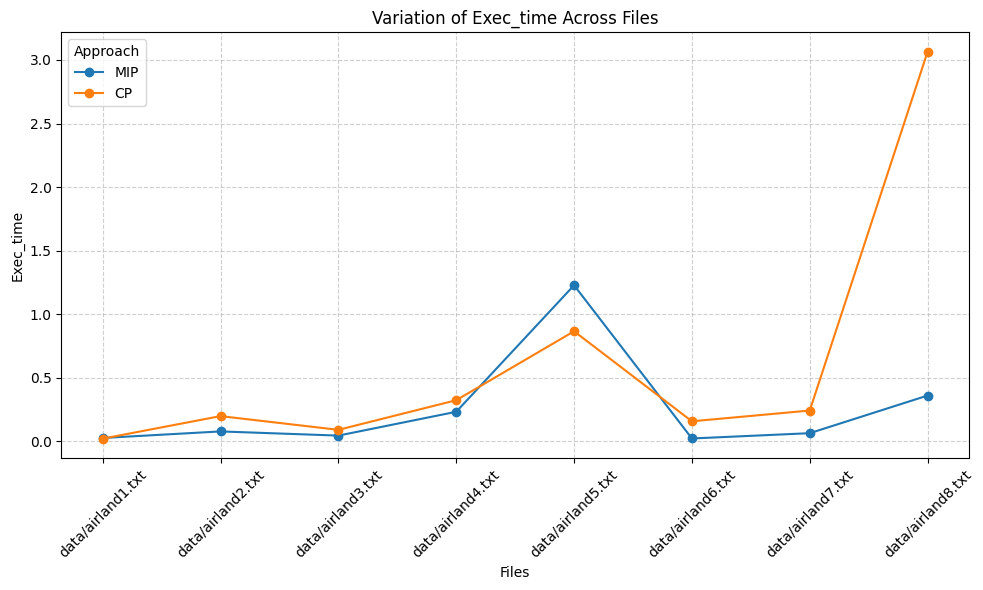

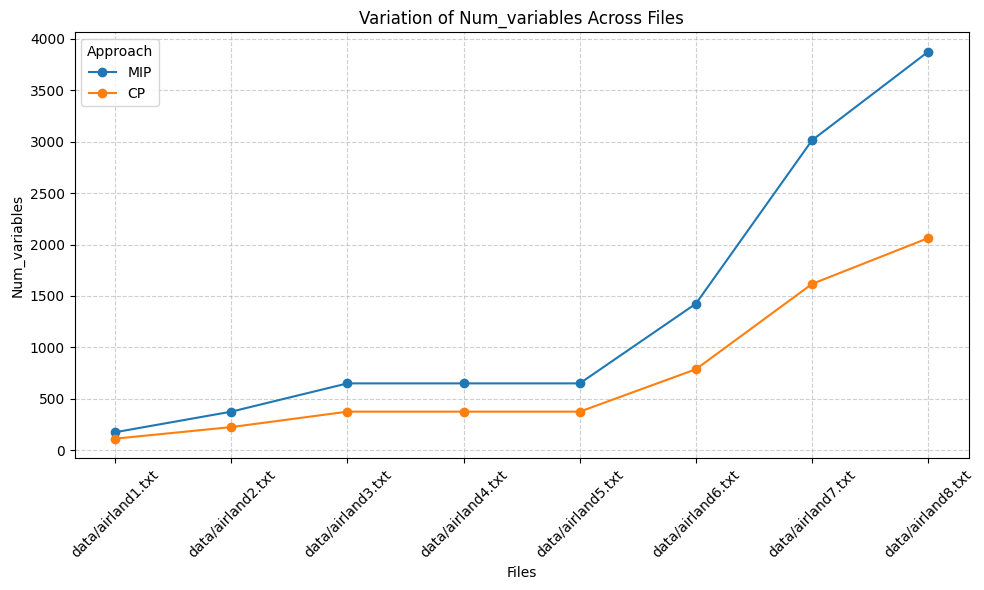

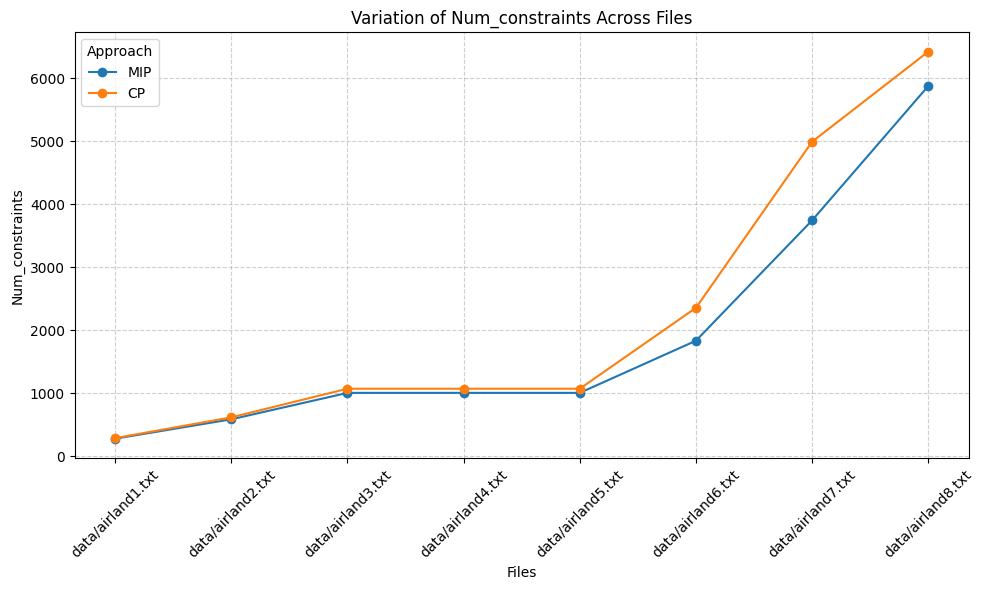

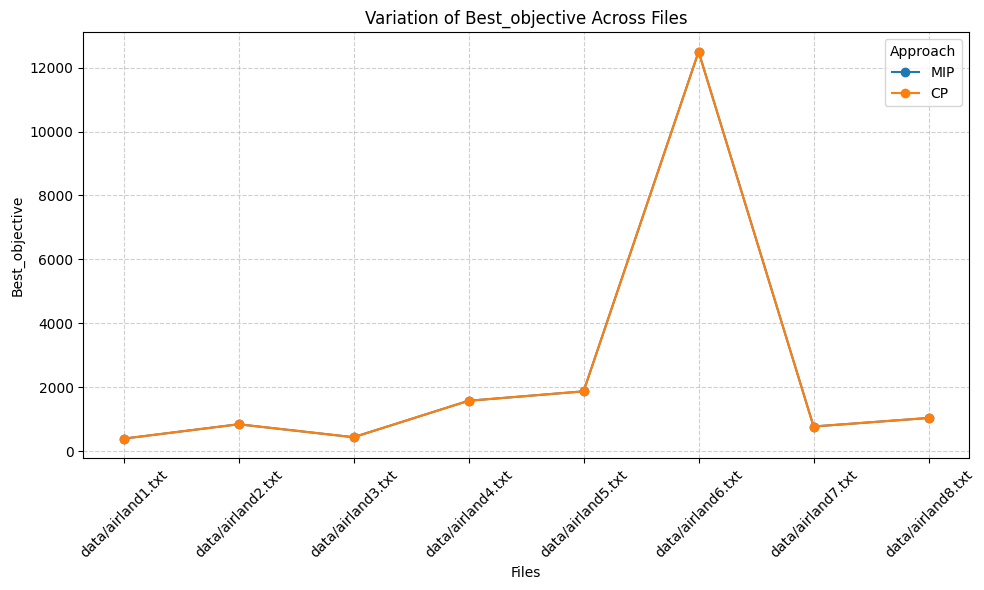

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Configurações iniciais
plot1_variables = ['exec_time', 'num_variables', 'num_constraints', 'best_objective']
files = [f"data/airland{i}.txt" for i in range(1, 9)]  # Lista de arquivos de 1 a 8
approaches = merged_results['approach'].unique()  # Obter os approaches únicos

# Criar gráficos para cada métrica
for variable in plot1_variables:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Adicionar uma linha para cada abordagem
    for approach in approaches:
        # Filtrar os dados para o approach atual
        approach_data = merged_results[
            (merged_results['file_name'].isin(files)) &
            (merged_results['approach'] == approach)
        ]
        
        # Calcular a média para cada arquivo
        file_means = approach_data.groupby('file_name')[variable].mean()
        
        # Plotar a linha
        ax.plot(file_means.index, file_means.values, marker='o', label=approach)
    
    # Configurações do gráfico
    ax.set_title(f"Variation of {variable.capitalize()} Across Files")
    ax.set_xlabel("Files")
    ax.set_ylabel(variable.capitalize())
    ax.legend(title="Approach")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Rotação dos labels no eixo X
    plt.xticks(rotation=45)
    
    # Ajustar layout e exibir
    plt.tight_layout()
    plt.show()


/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2040316481.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results[col] = pd.to_numeric(filtered_results[col], errors='coerce')
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2040316481.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results['branching_strategy'] = filtered_results['branching_strategy'].apply(abbreviate_strategy)
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2040

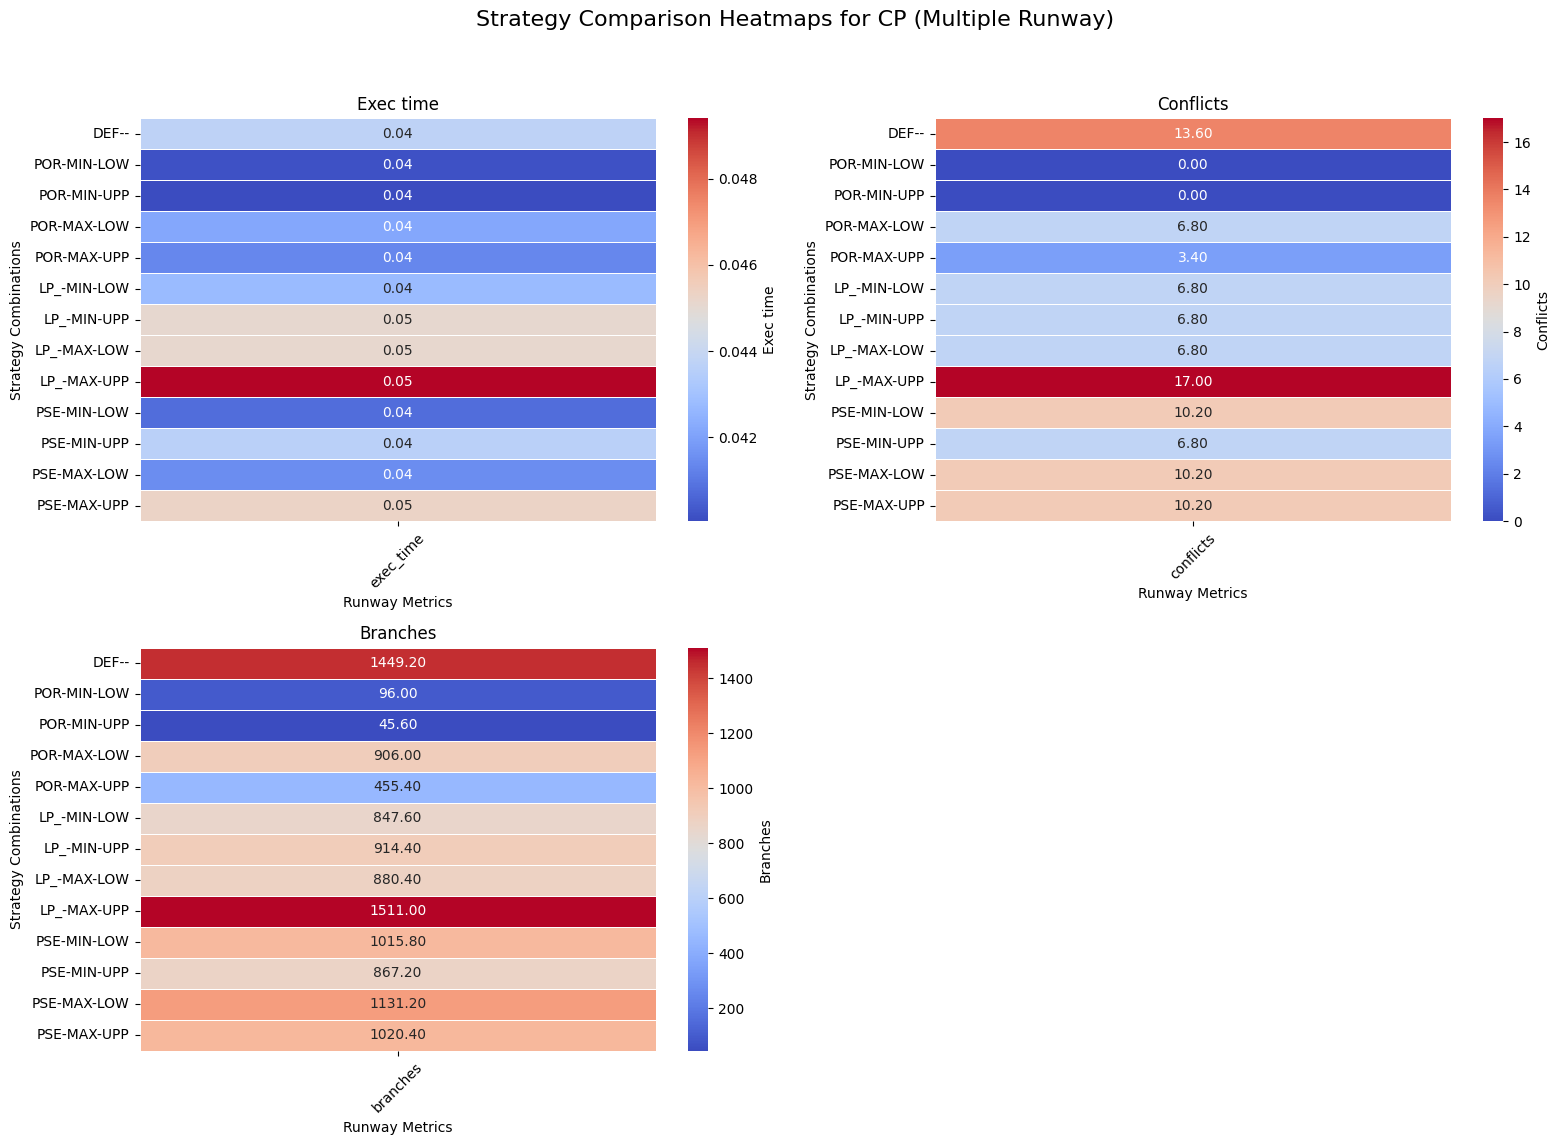

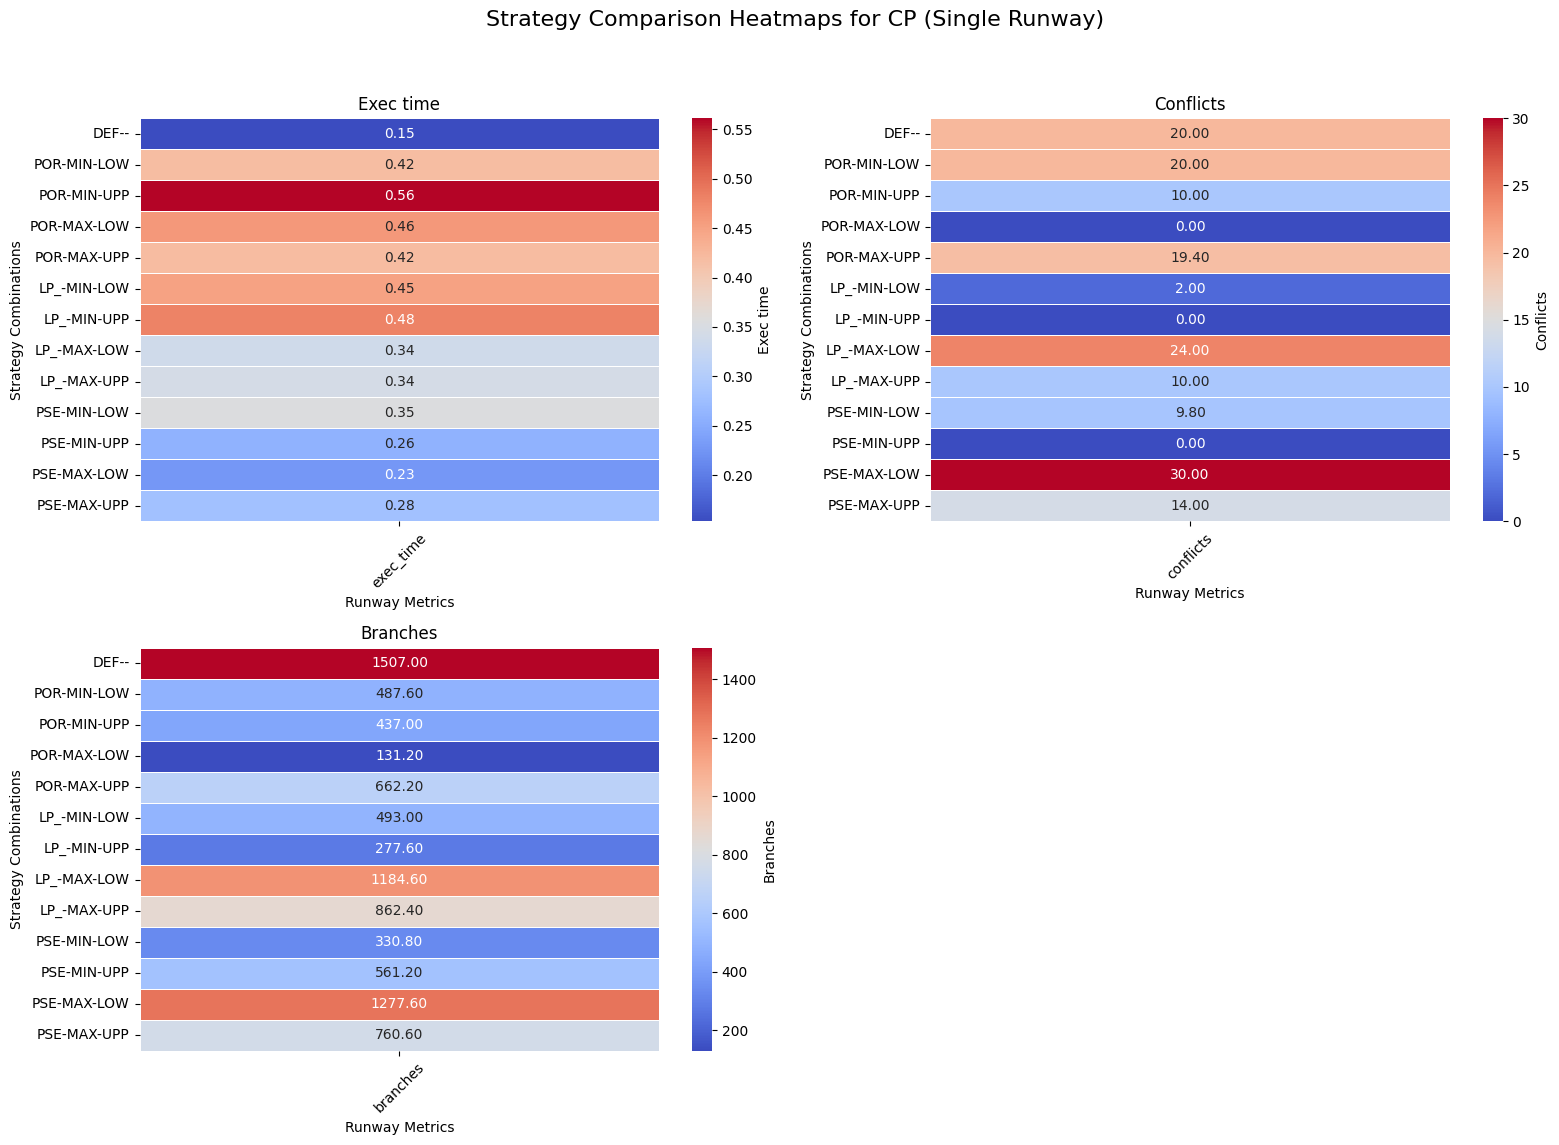

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Função para abreviar os nomes das combinações de estratégias
def abbreviate_strategy(name):
    if pd.isnull(name):
        return "N/A"
    return "-".join([
        word[:3].upper() if len(word) > 3 else word.upper() 
        for word in name.split("-")
    ])

def abbreviate_variable_strategy(name):
    if pd.isnull(name):
        return "N/A"
    return name[7:10].upper()

def abbreviate_value_strategy(name):
    if pd.isnull(name):
        return "N/A"
    return name[7:10].upper()

# Filtrar os dados para hint=False, approach=CP e file_name="data/airland2.txt"
filtered_results = merged_results[
    (merged_results['file_name'] == "data/airland2.txt") &
    (merged_results['hint'] == False) & 
    (merged_results['approach'] == 'CP')
]

# Métricas a serem exibidas
plot_metrics = ['exec_time', 'conflicts', 'branches']

# Garantir que as métricas são numéricas
for col in plot_metrics:
    if not pd.api.types.is_numeric_dtype(filtered_results[col]):
        # Converter para NaN onde não for numérico
        filtered_results[col] = pd.to_numeric(filtered_results[col], errors='coerce')

# Aplicar abreviação aos nomes das combinações de estratégias
if 'branching_strategy' in filtered_results.columns:
    filtered_results['branching_strategy'] = filtered_results['branching_strategy'].apply(abbreviate_strategy)
if 'variable_strategy' in filtered_results.columns:
    filtered_results['variable_strategy'] = filtered_results['variable_strategy'].apply(abbreviate_variable_strategy)
if 'value_strategy' in filtered_results.columns:
    filtered_results['value_strategy'] = filtered_results['value_strategy'].apply(abbreviate_value_strategy)

# Obter os runway_types
runway_types = filtered_results['runway_type'].unique()

for runway_type in runway_types:  # Iterar por todos os runway_types
    # Filtrar dados para o runway_type atual
    runway_data = filtered_results[filtered_results['runway_type'] == runway_type]
    
    # Definir o número de métricas para ajustar os subplots
    num_metrics = len(plot_metrics)
    n_cols = 2  # Número de colunas de subplots
    n_rows = (num_metrics + 1) // n_cols  # Calcular o número de linhas necessárias
    
    # Criar uma figura com subplots para cada métrica
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))
    axes = axes.flatten()  # Facilitar a iteração
    
    for idx, metric in enumerate(plot_metrics):
        ax = axes[idx]
        
        # Garantir que a métrica está no DataFrame
        if metric not in runway_data.columns:
            print(f"A métrica {metric} está ausente no dataset para {runway_type}.")
            continue
        
        # Criar a tabela diretamente para o heatmap (sem agregação, pois há apenas uma combinação)
        heatmap_data = runway_data.set_index(['branching_strategy', 'variable_strategy', 'value_strategy'])[[metric]]
        
        # Criar o heatmap para a métrica atual
        sns.heatmap(
            heatmap_data, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5, 
            cbar_kws={'label': metric.replace('_', ' ').capitalize()},
            ax=ax
        )
        ax.set_title(f"{metric.replace('_', ' ').capitalize()}")
        ax.set_ylabel("Strategy Combinations")
        ax.set_xlabel("Runway Metrics")
        ax.tick_params(axis='x', rotation=45)
    
    # Remover subplots extras caso existam
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Strategy Comparison Heatmaps for CP ({runway_type.capitalize()} Runway)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar layout para incluir o título
    plt.show()



/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

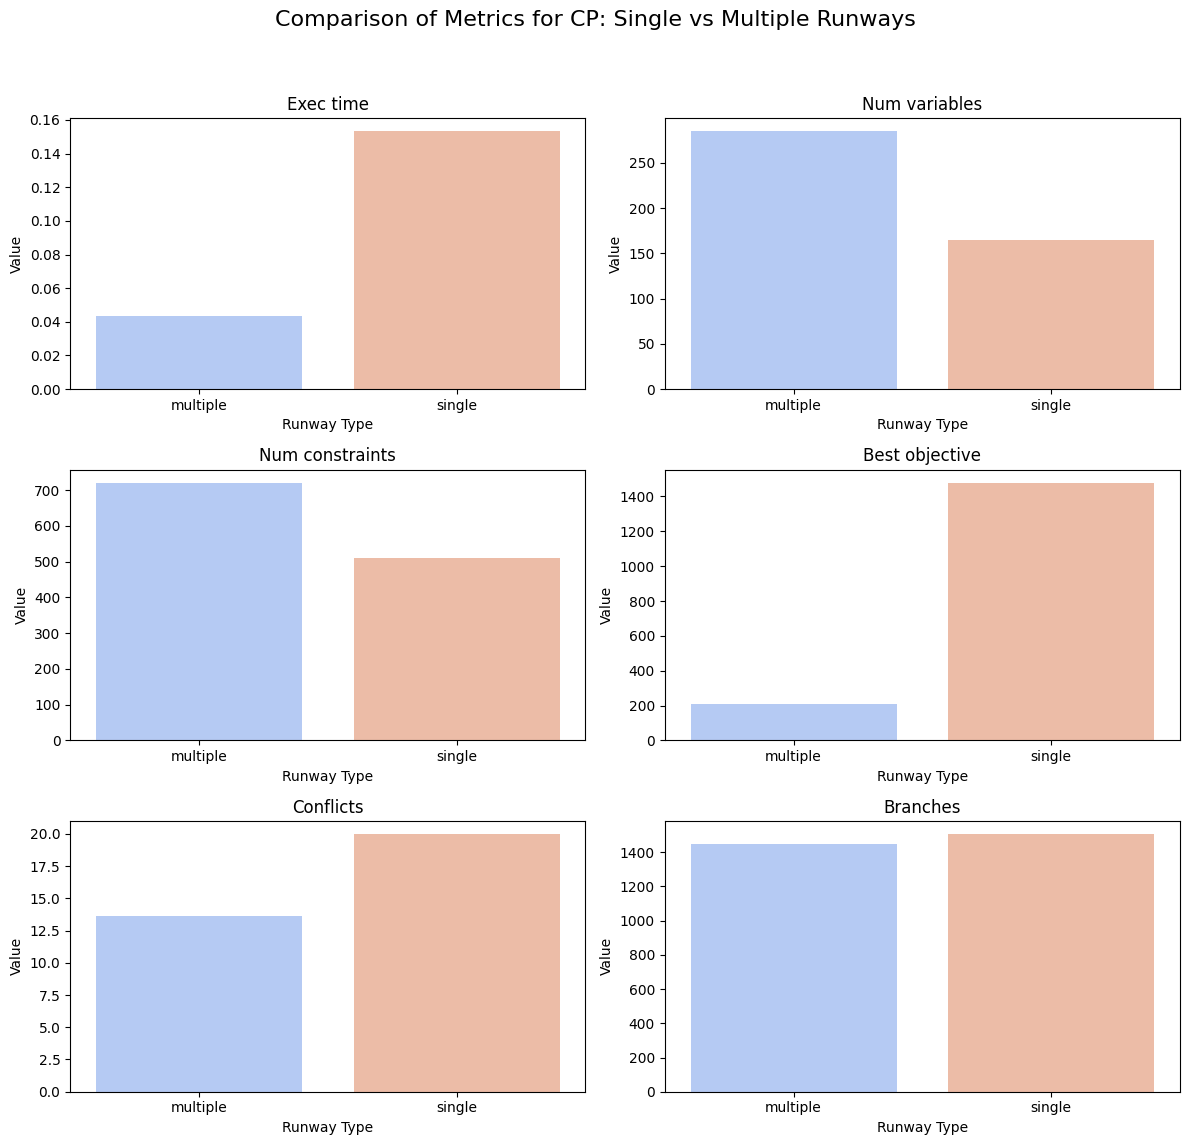

/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/t4/3szz82nx3pqg5dxmwdcj_4dw0000gn/T/ipykernel_36174/2746750766.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

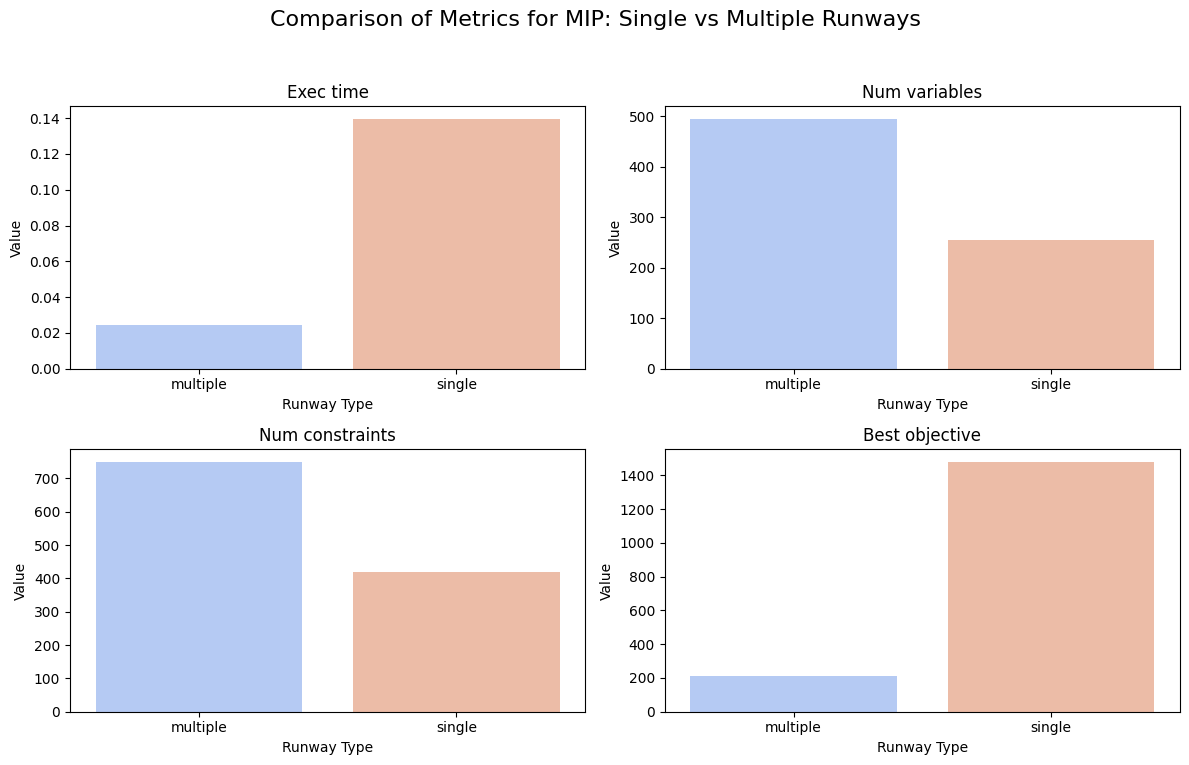

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para hint=False, approach=CP, file_name="data/airland2.txt" e estratégias default
filtered_results = merged_results[
    (merged_results['file_name'] == "data/airland2.txt") &
    (merged_results['hint'] == False) &
    (merged_results['branching_strategy'] == 'DEFAULT') &
    (merged_results['variable_strategy'] == 'DEFAULT') &
    (merged_results['value_strategy'] == 'DEFAULT')
]

# Métricas específicas para CP e MIP
cp_metrics = ['exec_time', 'num_variables', 'num_constraints', 'best_objective', 'conflicts', 'branches']
mip_metrics = ['exec_time', 'num_variables', 'num_constraints', 'best_objective']

# Função para plotar as métricas em uma grelha
def plot_metrics_grid(data, metrics, title):
    # Agrupar e calcular a média das métricas por runway_type
    comparison_data = data.groupby(['runway_type'])[metrics].mean().reset_index()

    # Transformar os dados para um formato longo para o seaborn
    comparison_data_long = comparison_data.melt(id_vars=['runway_type'], var_name='Metric', value_name='Value')

    # Obter as métricas únicas
    unique_metrics = comparison_data_long['Metric'].unique()
    num_metrics = len(unique_metrics)

    if num_metrics == 0:
        print(f"Sem dados disponíveis para o gráfico: {title}")
        return

    # Configurar o tamanho da grelha
    n_cols = 2  # Número de colunas
    n_rows = (num_metrics + 1) // n_cols

    # Criar os subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
    axes = axes.flatten()  # Facilitar a iteração

    for idx, metric in enumerate(unique_metrics):
        ax = axes[idx]
        # Filtrar os dados para a métrica atual
        metric_data = comparison_data_long[comparison_data_long['Metric'] == metric]

        # Criar o gráfico de barras agrupadas
        sns.barplot(
            data=metric_data,
            x='runway_type',
            y='Value',
            ax=ax,
            palette='coolwarm'
        )
        ax.set_title(metric.replace('_', ' ').capitalize())
        ax.set_xlabel("Runway Type")
        ax.set_ylabel("Value")

    # Remover subplots extras
    for idx in range(len(unique_metrics), len(axes)):
        fig.delaxes(axes[idx])

    # Ajustar o layout
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Filtrar os dados para CP
cp_data = filtered_results[filtered_results['approach'] == 'CP']
plot_metrics_grid(cp_data, cp_metrics, "Comparison of Metrics for CP: Single vs Multiple Runways")

# Filtrar os dados para MIP
mip_data = filtered_results[filtered_results['approach'] == 'MIP']
plot_metrics_grid(mip_data, mip_metrics, "Comparison of Metrics for MIP: Single vs Multiple Runways")